<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Regression_implementation_on_UberRide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('uber.csv')

data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['hour']=data['pickup_datetime'].dt.hour
data['day_of_week']=data['pickup_datetime'].dt.dayofweek
data=data.drop(columns=['Unnamed: 0','key','pickup_datetime'])

imputer = SimpleImputer (strategy='mean')
data_imputed=pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X= data_imputed.drop(columns=['fare_amount'])
y= data_imputed['fare_amount']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2


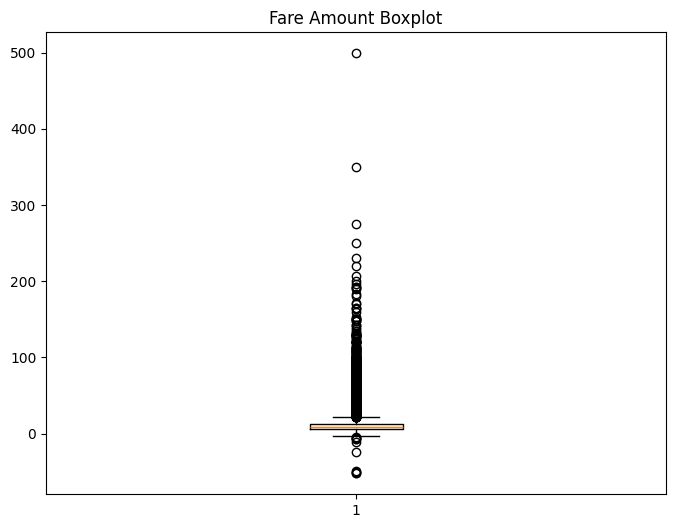

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(data=data, x='fare_amount')
plt.title('Fare Amount Boxplot')
plt.show()

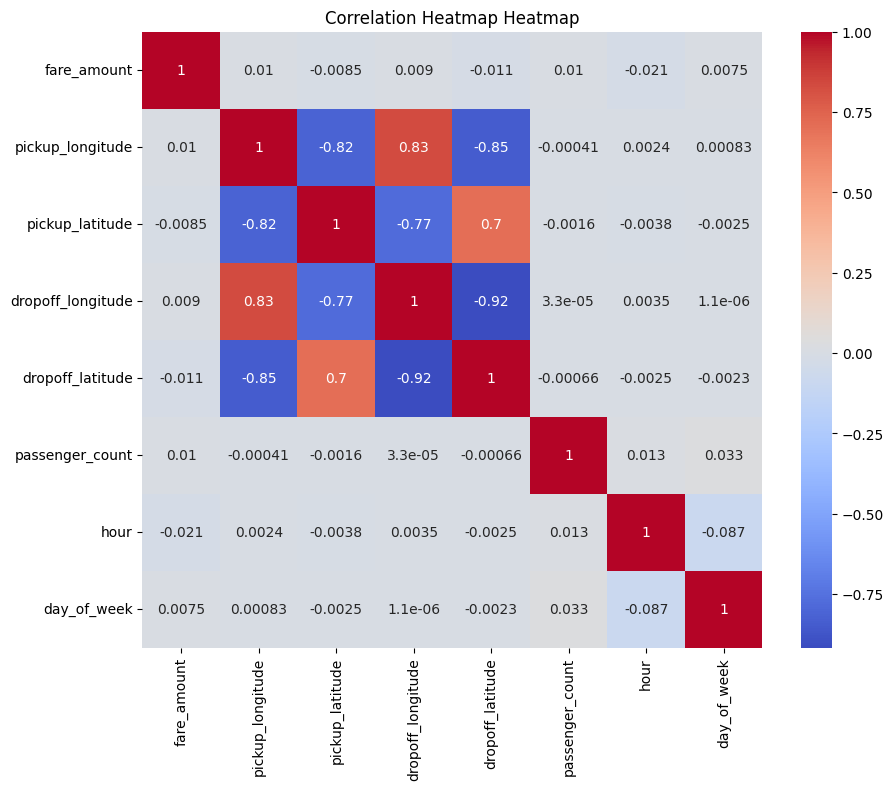

In [ ]:
correlation_metrics=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Heatmap')
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
r2_lr=r2_score(y_test, y_pred_lr)
rms_lr=np.sqrt(mean_squared_error(y_test, y_pred_lr))

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
r2_ridge=r2_score(y_test, y_pred_ridge)
rms_ridge=np.sqrt(mean_squared_error(y_test, y_pred_ridge))

lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
r2_lasso=r2_score(y_test, y_pred_lasso)
rms_lasso=np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Linear Regression:", r2_lr, "RMS:" ,rms_lr)
print("Ridge Regression:",r2_ridge, "RMS:" ,rms_ridge)
print("Lasso Regression:",r2_lasso, "RMS:" ,rms_lasso)

Linear Regression: 0.0007463283549304922 RMS: 10.307359776695948
Ridge Regression: 0.0007463283089118589 RMS: 10.307359776933293
Lasso Regression: 0.00018705456061196557 RMS: 10.310243844073652
